Imports


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors



Dataset loading

In [19]:
def load_or_create_dataset(filepath='dataset.csv', create_new=False, n_samples=1000, n_features=20):
    if create_new:
        data = np.random.rand(n_samples, n_features)
        labels = np.random.randint(0, 2, n_samples)
        dataset = pd.DataFrame(data)
        dataset['label'] = labels
        dataset.to_csv(filepath, index=False)
    else:
        dataset = pd.read_csv(filepath)
    
    return dataset

# Load or create the dataset
dataset = load_or_create_dataset(create_new=False)
#label encoding
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['day'] = le.fit_transform(dataset['day'])
dataset['time'] = le.fit_transform(dataset['time'])


#one hot ecoding
#dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'day', 'time'])
#convert true and false to 1 and 0


label_name = 'tip'
dataset.rename(columns={label_name:'label'}, inplace=True)

dataset.head()

,total_bill,label,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


Dataset Visualization and statistics

1. Visualize the following metrics:
    - Pair plot of all variables
    - Basic statistics including mean, std etc



C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

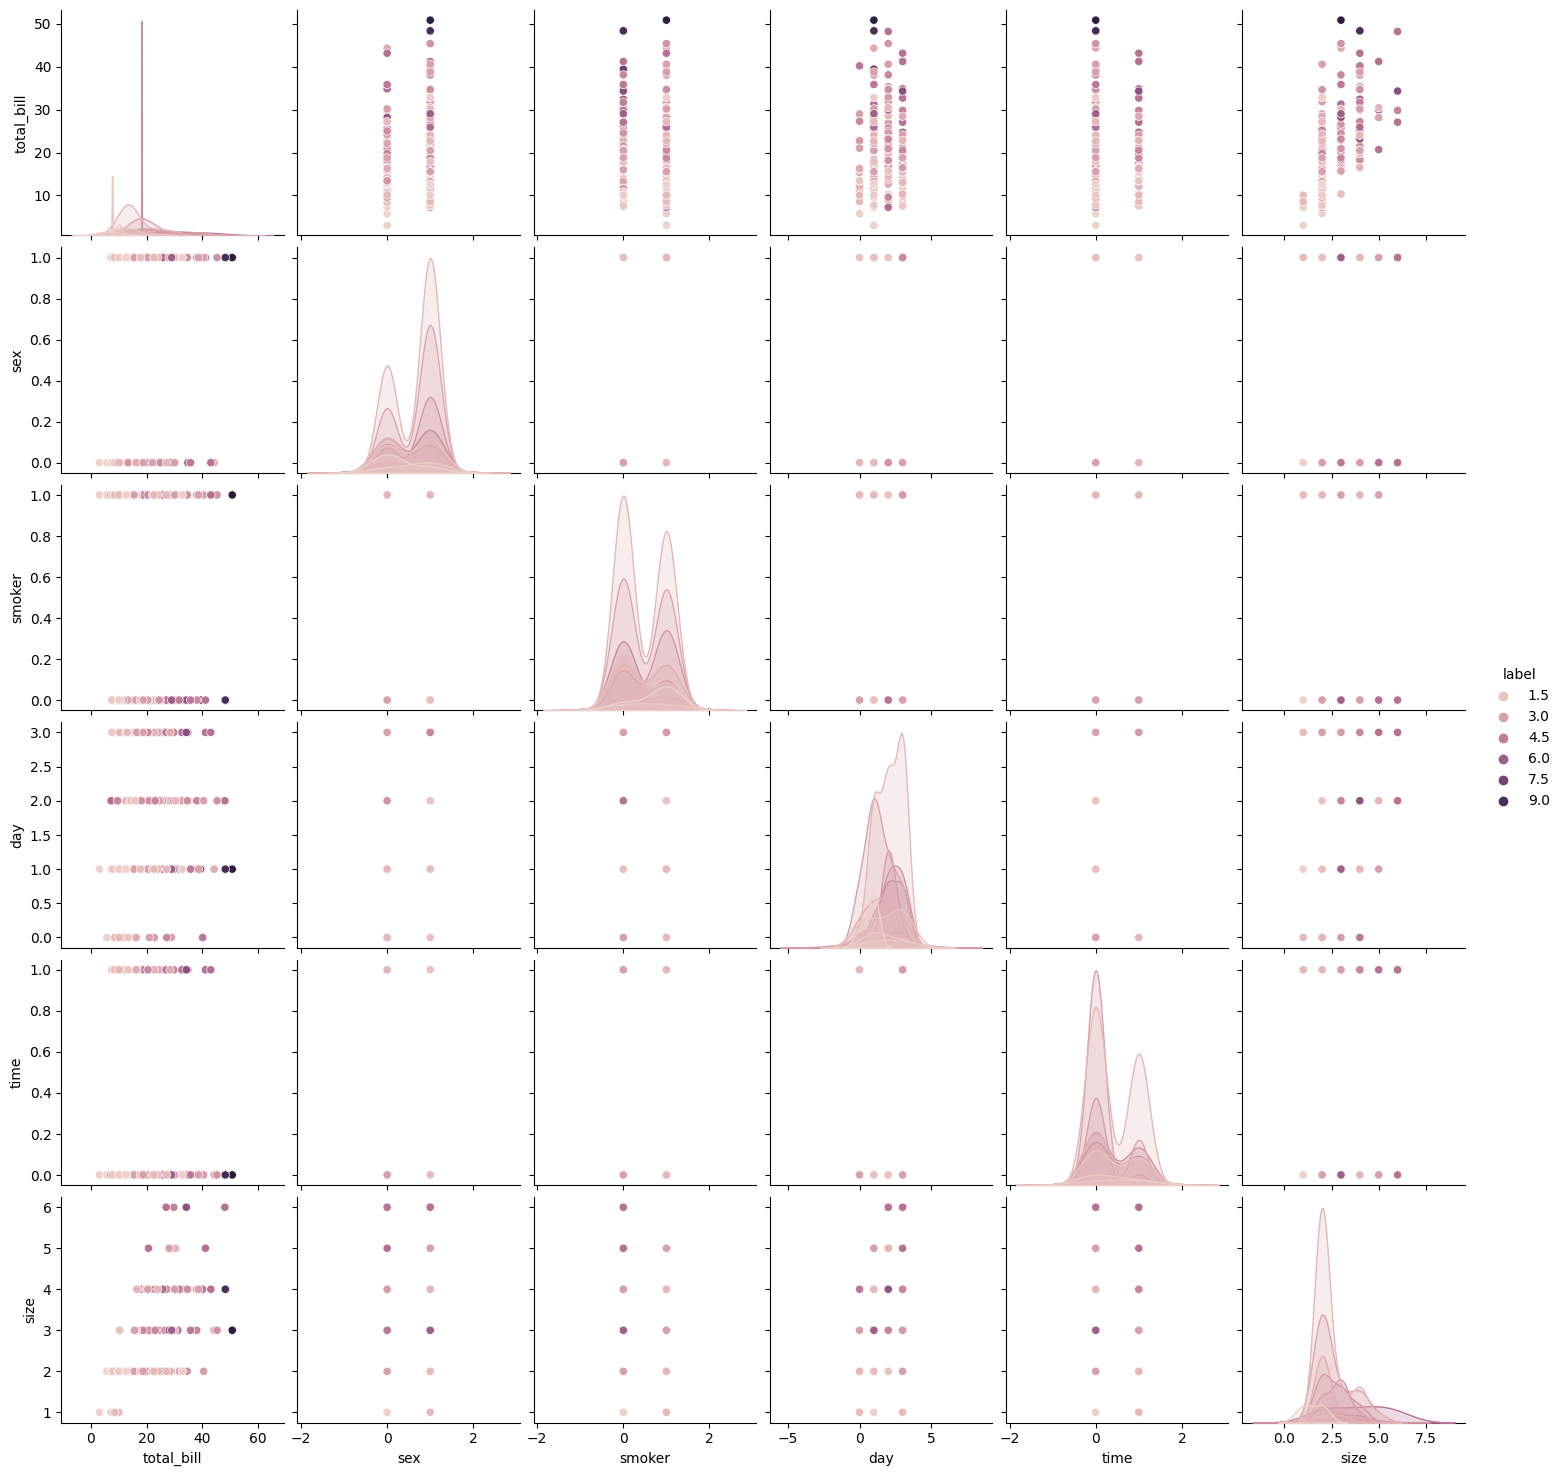

,total_bill,label,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [20]:
#create and show a pair plot of the clusters
sns.pairplot(dataset, hue='label')
plt.show()

dataset.describe()

Clustering Phase:

Cluster the dataset into different clusters
1. We will use 4 different clustering algorithms:
    - K-Means
    - DBSCAN
    - GMM
    - Spectral Clustering

2. Generate meaningfull insights into each clustering algorithm and outcome:
    - cardinality

    TODO: look at clustering before train test split or after, reclustering clusters may be useful too (dynamic clusering based on problem domain effects)

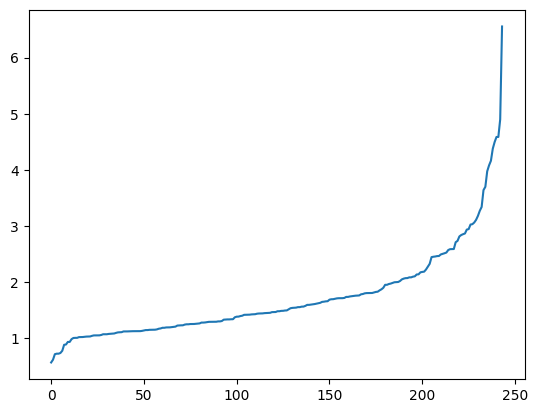

In [21]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.show()

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

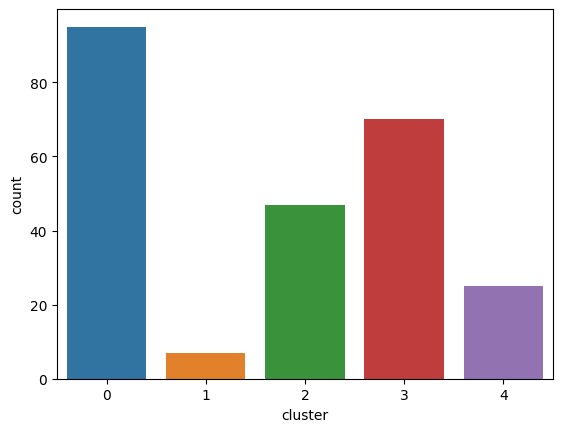

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

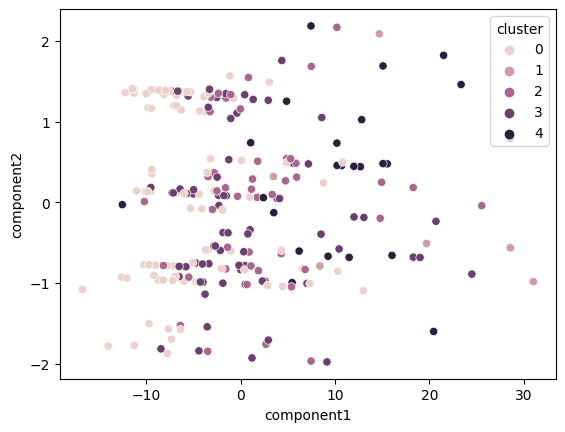

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

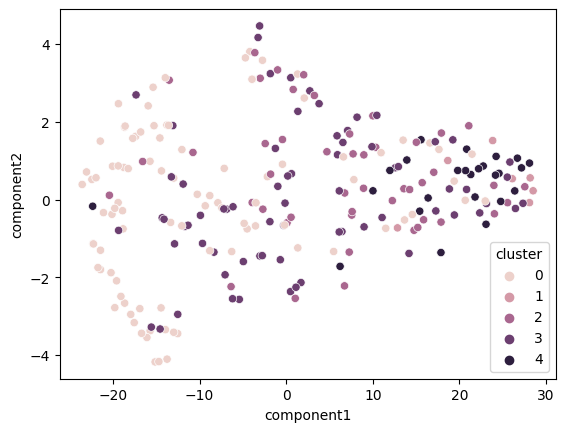

In [22]:
#kmeans clustering
def cluster_dataset_kmeans_features(dataset, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset.drop('label', axis=1).values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#kmeans clustering on just the label method def
def cluster_dataset_kmeans_label(dataset, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset[['label']].values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#DBSCAN clustering on the features
def cluster_dataset_dbscan_features(dataset, eps=2.5, min_samples=7):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    features = dataset.drop('label', axis=1).values
    clusters = dbscan.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#DBSCAN clustering on the label
def cluster_dataset_dbscan_label(dataset, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    features = dataset[['label']].values
    clusters = dbscan.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

# Call the clustering method
n_clusters = 5
dataset, clusters = cluster_dataset_kmeans_label(dataset, n_clusters=n_clusters)
dataset.head()

#graph the clusters
sns.countplot(x='cluster', data=dataset)
plt.show()

#create a pca plot of the clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.show()

#create a T-SNE plot of the clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.show()



Consider doing some analysis on the clusters, identify the number of entries / clusters. If a cluster is less than a certian threshold (hyperparameter) then we throw it out (or something else?)

Also consider usig more records for other clusters if the cardinality is unequal

Split the dataset into training and testing data

In [23]:
#split the dataset into training and testing
def split_dataset(dataset, test_size):
    mask = np.random.rand(len(dataset)) < 1 - test_size
    train_dataset = dataset[mask]
    test_dataset = dataset[~mask]
    
    return train_dataset, test_dataset

train_dataset, test_dataset = split_dataset(dataset, test_size=0.2)

# train_dataset.describe()

# test_dataset.describe()


Model and Optimizer Definitions

In [24]:
#Define the model architecture
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(CustomModel, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    
#Define the custom optimizer
class COSGD(optim.Optimizer):
    def __init__(self, params, lr=1e-3):
        defaults = dict(lr=lr)
        super(COSGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                p.data.add_(-group['lr'], d_p)
        
        return loss

#write a method to take in a tensor of gradient update values and convert them to a vector
def flatten_grads(grads):
    grads = torch.cat([grad.view(-1) for grad in grads])
    return grads

#write a method to take in a vector and convert it back to a tensor of the same shape as the model parameters
def unflatten_grads(flattened_grads, model):
    grads = []
    start = 0
    for param in model.parameters():
        end = start + param.numel()
        grads.append(flattened_grads[start:end].view(param.size()))
        start = end
    return grads

#write a method to perform the gramm schmidt process that takes in a a set of tensors of gradient updates for each cluster and returns a set of orthogonalized tensors for each cluster
def orthogonalize_grads(grads):
    #print out the shape of the grads and the actual grads for each cluster
    # for i, cluster_grads in enumerate(grads):
    #     print(f'Cluster {i+1} shape: {[grad.shape for grad in cluster_grads]}')
    #     print(f'Cluster {i+1} grads: {cluster_grads}')
    #convert each tensor in each cluster to a vector
    flattened_grads = [flatten_grads(cluster_grads) for cluster_grads in grads]
    #print out the shape of the flattened grads, and then each vector with a label (cluster 1, cluster 2 etc)
    # for i, grad in enumerate(flattened_grads):
    #     print(f'Cluster {i+1} shape: {grad.shape}')
    #     print(f'Cluster {i+1} vector: {grad}')
    #now we have a set of vectors, we can perform the gram schmidt process
    ortho_grads = []
    for i, grad in enumerate(flattened_grads):
        for j in range(i):
            #subtract the projection of the current vector onto the previous vectors
            if torch.norm(ortho_grads[j]) != 0:
                grad = grad - (grad @ ortho_grads[j]) / (ortho_grads[j] @ ortho_grads[j]) * ortho_grads[j]
        ortho_grads.append(grad)
    return ortho_grads



In [25]:
#write a method that takes in a set of vectors, and orthogonalizes them using the gram schmidt process, it shoudl account for zero vectors
def orthogonalize_vectors(vectors):
    ortho_vectors = []
    for i, vector in enumerate(vectors):
        for j in range(i):
            if torch.norm(ortho_vectors[j]) > 0:
                vector = vector - (vector @ ortho_vectors[j]) / (ortho_vectors[j] @ ortho_vectors[j]) * ortho_vectors[j]
        ortho_vectors.append(vector)
    return ortho_vectors

In [26]:
#create an example tensor of gradients for a model with 6 input features, 1 hidden layer with 6 neurons, and 1 output neuron
grads = [torch.randn(6, 6), torch.randn(6), torch.randn(6, 1), torch.randn(1)]
print(grads)

[tensor([[ 0.3097,  1.2543, -0.8456, -1.0183, -0.1786,  1.2577],
        [ 0.5626, -0.5144,  0.9677, -1.3394,  0.4389,  1.1625],
        [-1.4252,  0.3193,  1.1185,  1.2380,  0.9854, -0.2138],
        [ 0.3970,  1.4785,  1.0628, -0.7112, -0.6332,  0.6273],
        [-1.0998,  0.1601,  0.7016, -1.3719,  1.6841,  0.3285],
        [ 0.6668,  0.0789,  1.3736, -0.4956,  0.8769,  0.0390]]), tensor([ 0.9858,  1.1343,  1.6935, -1.6230,  1.2747, -0.3703]), tensor([[-0.6652],
        [-1.5243],
        [ 0.8222],
        [-2.1139],
        [-0.3084],
        [-0.2716]]), tensor([-0.0020])]


Control Model

In [27]:
# Define the training loop for the control model (standard)
def train_model(model, optimizer, dataloader, loss_function, epochs=10):
    criterion = loss_function
    model.train()
    
    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        #print the loss every epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
            
    return model

#prepare data loader for the control model
features = train_dataset.drop(['label', 'cluster'], axis=1).values
labels = train_dataset['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader_control = DataLoader(tensor_data, batch_size=32, shuffle=True)


COSGD Model

In [28]:
#get the minimum cardinality of a cluster from all the clusters
min_cluster_size = train_dataset['cluster'].value_counts().min()
#convert to integer
min_cluster_size = int(min_cluster_size)


# Prepare data loaders for each cluster for the COSGD optimizer and name them as such
dataloaders = {}
for cluster in range(n_clusters):
    cluster_data = train_dataset[train_dataset['cluster'] == cluster]
    features = cluster_data.drop(['label', 'cluster'], axis=1).values
    labels = cluster_data['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders[f'cluster_{cluster}'] = DataLoader(tensor_data, batch_size=min_cluster_size, shuffle=True)

#print the data loaders
print(dataloaders)
#print the number of clusters and the minimum cluster size
print(f'Number of clusters: {n_clusters}, Minimum cluster size: {min_cluster_size}')

#write a method to train the model using COSGD, this method will train the model over each cluster without updating the model parameters. It will store each clusters gradient updates in a list and then orthogonalize the gradients. The orthogonalized gradients will then be used to update the model parameters by applying each set of orthogonalized gradients to the model parameters
def train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs=10):
    criterion = loss_function
    model.train()
    
    for epoch in range(epochs):
        grads = []
        for cluster, dataloader in dataloaders.items():
            print(f'Training on cluster: {cluster}')
            for inputs, labels in dataloader:
                print('in the trainer')
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                grads.append([param.grad.clone() for param in model.parameters()])
                break
        
        #print the shape of the gradients
        #print(grads)
        #orthogonalize the gradients
        grads = orthogonalize_grads(grads)
        grads = [unflatten_grads(grad, model) for grad in grads]
        for grad in grads:
            for param, g in zip(model.parameters(), grad):
                param.grad = g
        optimizer.step()

        #print the loss every epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
    
    return model


{'cluster_0': <torch.utils.data.dataloader.DataLoader object at 0x0000018E6565EFB0>, 'cluster_1': <torch.utils.data.dataloader.DataLoader object at 0x0000018E657E2230>, 'cluster_2': <torch.utils.data.dataloader.DataLoader object at 0x0000018E657E29E0>, 'cluster_3': <torch.utils.data.dataloader.DataLoader object at 0x0000018E5E9FAF50>, 'cluster_4': <torch.utils.data.dataloader.DataLoader object at 0x0000018E651DA230>}
Number of clusters: 5, Minimum cluster size: 6


Define the models

In [29]:
# Define model architectures
input_size = dataset.shape[1] - 2  # excluding label and cluster columns
hidden_layers = [input_size]
output_size = 1
model_control = CustomModel(input_size, hidden_layers, output_size)
model_cosgd = CustomModel(input_size, hidden_layers, output_size)

# Define optimizers
optimizer_control = optim.SGD(model_control.parameters(), lr=0.01)
optimizer_cosgd = COSGD(model_cosgd.parameters(), lr=0.01)

Train the models

In [34]:
# Define model architectures
input_size = dataset.shape[1] - 2  # excluding label and cluster columns
hidden_layers = [input_size]
output_size = 1
model_control = CustomModel(input_size, hidden_layers, output_size)
model_cosgd = CustomModel(input_size, hidden_layers, output_size)

# Define optimizers
optimizer_control = optim.SGD(model_control.parameters(), lr=0.01)
optimizer_cosgd = COSGD(model_cosgd.parameters(), lr=0.01)

#create loss function
loss_function = nn.MSELoss()

# Train models
start_time_control = time.time()
model_control = train_model(model_control, optimizer_control, dataloader_control, loss_function, epochs=10)
end_time_control = time.time()

start_time_cosgd = time.time()
model_cosgd = train_model_cosgd(model_cosgd, optimizer_cosgd, dataloaders, loss_function, epochs=10)
end_time_cosgd = time.time()

# Print results
print(f"SGD Training Time: {end_time_control - start_time_control:.2f} seconds")
print(f"COSGD Training Time: {end_time_cosgd - start_time_cosgd:.2f} seconds")


# Prepare data loaders for testing
features = test_dataset.drop(['label', 'cluster'], axis=1).values
labels = test_dataset['label'].values

tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader = DataLoader(tensor_data, batch_size=1, shuffle=True)

#evaluate both models over the test set recording the MAE, MSE and R-Squared
def evaluate_model(model, dataloader):
    model.eval()
    mae = 0
    mse = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            #print out the actual value and outputed value:
            print(f"Actual value: {labels}")
            print(f"Predicted value: {outputs}")
            mae += torch.sum(torch.abs(outputs - labels)).item()
            mse += torch.sum((outputs - labels) ** 2).item()
    mae /= len(dataloader.dataset)
    mse /= len(dataloader.dataset)
    return mae, mse

mae_control, mse_control = evaluate_model(model_control, dataloader)
print("====================================================")
mae_cosgd, mse_cosgd = evaluate_model(model_cosgd, dataloader)

print(f"Control Model MAE: {mae_control:.2f}, MSE: {mse_control:.2f}")
print(f"COSGD Model MAE: {mae_cosgd:.2f}, MSE: {mse_cosgd:.2f}")







Epoch 1/10, Loss: 9.49160385131836
Epoch 2/10, Loss: 6.144842624664307
Epoch 3/10, Loss: 3.1642839908599854
Epoch 4/10, Loss: 6.0439863204956055
Epoch 5/10, Loss: 0.8282713890075684
Epoch 6/10, Loss: 9.31098461151123
Epoch 7/10, Loss: 0.46284380555152893
Epoch 8/10, Loss: 2.8772830963134766
Epoch 9/10, Loss: 8.182350158691406
Epoch 10/10, Loss: 1.2894564867019653
Training on cluster: cluster_0
in the trainer
Training on cluster: cluster_1
in the trainer
Training on cluster: cluster_2
in the trainer
Training on cluster: cluster_3
in the trainer
Training on cluster: cluster_4
in the trainer
Epoch 1/10, Loss: 1.4272996187210083
Training on cluster: cluster_0
in the trainer
Training on cluster: cluster_1
in the trainer
Training on cluster: cluster_2
in the trainer
Training on cluster: cluster_3
in the trainer
Training on cluster: cluster_4
in the trainer
Epoch 2/10, Loss: 0.9312655329704285
Training on cluster: cluster_0
in the trainer
Training on cluster: cluster_1
in the trainer
Training

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

Analyse the models performance
TODO - decide on metrics to use 
